In [6]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt


In [7]:
df = pd.read_csv('data.csv', parse_dates=['Date', 'Time'], index_col='Date')

In [8]:
def find_speed(a):
    # Return km in h spead 
    return( (a.hour+a.minute/60+a.second/(60*60) ))

df['Time_h'] = df['Time'].map(find_speed)
df['Speed'] = df['Distance']/df['Time_h']
df['Effective'] = df['Speed']/df['Avg HR']

In [18]:
df2022 = df.groupby(pd.Grouper(freq='W'))

C:\Users\alvv\AppData\Local\Temp\ipykernel_22364\3996044060.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2022.mean().plot(y='Effective', use_index=True, ax= ax, figsize=(15,5))
C:\Users\alvv\AppData\Local\Temp\ipykernel_22364\3996044060.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2022.sum().plot(y='Distance', use_index=True, ax= ax, figsize=(15,5), secondary_y=True)


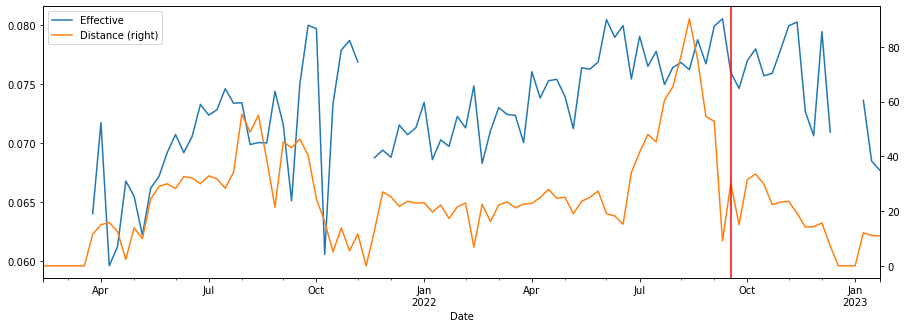

In [19]:
fig, ax = plt.subplots()
df2022.mean().plot(y='Effective', use_index=True, ax= ax, figsize=(15,5))
df2022.sum().plot(y='Distance', use_index=True, ax= ax, figsize=(15,5), secondary_y=True)
plt.axvline(datetime(year=2022,month=9,day=18), c='r')